In [6]:
import gym
import kelly_gym
from kelly_gym.envs import KellyEnv

import numpy as np

env = gym.make("Kelly-v0")

In [7]:
# Random Agent
observation = env.reset()
for t in range(1000):
    action = [1, np.array([.16])]
    observation, reward, done, info = env.step(action)
#     print(action, observation, reward, done, info) 
    if done:
        break
env.render()

In [8]:
env.history

[25.0,
 29.0,
 24.36,
 28.26,
 32.78,
 38.02,
 31.94,
 26.83,
 22.54,
 26.15,
 30.33,
 25.48,
 29.56,
 34.29,
 28.8,
 24.19,
 28.06,
 32.55,
 37.76,
 43.8,
 50.81,
 58.94,
 68.37,
 79.31,
 92.0,
 77.28,
 89.64,
 75.3,
 87.35,
 73.37,
 85.11,
 98.73,
 114.53,
 96.21,
 111.6,
 129.46,
 108.75,
 126.15,
 146.33,
 169.74,
 196.9,
 228.4,
 264.94,
 222.55,
 258.16,
 216.85,
 182.15,
 153.01,
 177.49,
 205.89,
 238.83,
 200.62,
 232.72,
 195.48,
 164.2,
 190.47,
 220.95,
 256.3,
 297.31,
 344.88,
 289.7,
 336.05,
 389.82,
 327.45,
 275.06,
 319.07,
 370.12,
 429.34,
 498.03,
 418.35,
 485.29,
 562.94,
 653.01,
 757.49,
 636.29,
 738.1,
 620.0,
 719.2,
 834.27,
 967.75,
 1122.59,
 1302.2,
 1093.85,
 1268.87,
 1471.89,
 1236.39,
 1434.21,
 1663.68,
 1929.87,
 2238.65,
 1880.47,
 1579.59,
 1326.86,
 1539.16,
 1785.43,
 2071.1,
 1739.72,
 2018.08,
 2340.97,
 2715.53,
 3150.01,
 3654.01,
 4238.65,
 3560.47,
 4130.15,
 3469.33,
 4024.42,
 4668.33,
 3921.4,
 4548.82,
 3821.01,
 4432.37,
 5141.55,
 

In [4]:
import ray
from ray.rllib.agents.ppo.ppo import PPOTrainer 
ray.init()
agent = PPOTrainer(env=KellyEnv, config={"framework": "torch"})
agent.restore("checkpoint_25/checkpoint-25")

2020-09-30 19:31:25,879	INFO resource_spec.py:223 -- Starting Ray with 2.29 GiB memory available for workers and up to 1.15 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-09-30 19:31:26,758	INFO services.py:1191 -- View the Ray dashboard at localhost:8265
2020-09-30 19:31:31,138	INFO trainer.py:630 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
/home/azharichenko/.local/share/virtualenvs/kelly-criterion-rl-xIioxHR7/lib/python3.8/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32

2020-09-30 19:31:31,371	WARNING util.py:37 -- Install gputil for GPU system monitoring.
2020-09-30 19:31:31,413	INFO trainable.py:472 -- Restored on 192.168.86.161 from checkpoint: checkpoint_25/checkpoint-25
2020-09-30 19:31:31,418	INFO trainable.py:480 -- Current state after restoring: {'_iteration': 25, '_timesteps_total': Non

In [5]:
agent.compute_action([25.0, 0.6])

(1, array([0.03513181], dtype=float32))

-0.01 (1, array([0.], dtype=float32)) [25.0, 0.6]
-0.02867709 (1, array([0.09338544], dtype=float32)) [22.67, 0.6]
-0.15367275 (1, array([0.6249783], dtype=float32)) [8.5, 0.6]
-0.15588228 (1, array([0.0110476], dtype=float32)) [8.41, 0.6]
-0.15588228 (1, array([0.], dtype=float32)) [8.41, 0.6]
-0.08038249 (1, array([0.3774989], dtype=float32)) [11.58, 0.6]
-0.024256527 (1, array([0.18724437], dtype=float32)) [13.75, 0.6]
0.24413632 (1, array([0.71698594], dtype=float32)) [23.61, 0.6]
0.276084 (1, array([0.14869069], dtype=float32)) [27.12, 0.6]
0.34256342 (1, array([0.33239707], dtype=float32)) [36.13, 0.6]
0.3445078 (1, array([0.38722095], dtype=float32)) [50.12, 0.6]
0.31447935 (1, array([0.03710198], dtype=float32)) [51.98, 0.6]
0.16928978 (1, array([0.00896169], dtype=float32)) [51.51, 0.6]
0.063911386 (1, array([0.37820143], dtype=float32)) [32.03, 0.6]
-0.0025680396 (1, array([0.], dtype=float32)) [32.03, 0.6]
-0.05654318 (1, array([0.11734523], dtype=float32)) [35.79, 0.6]
0.01

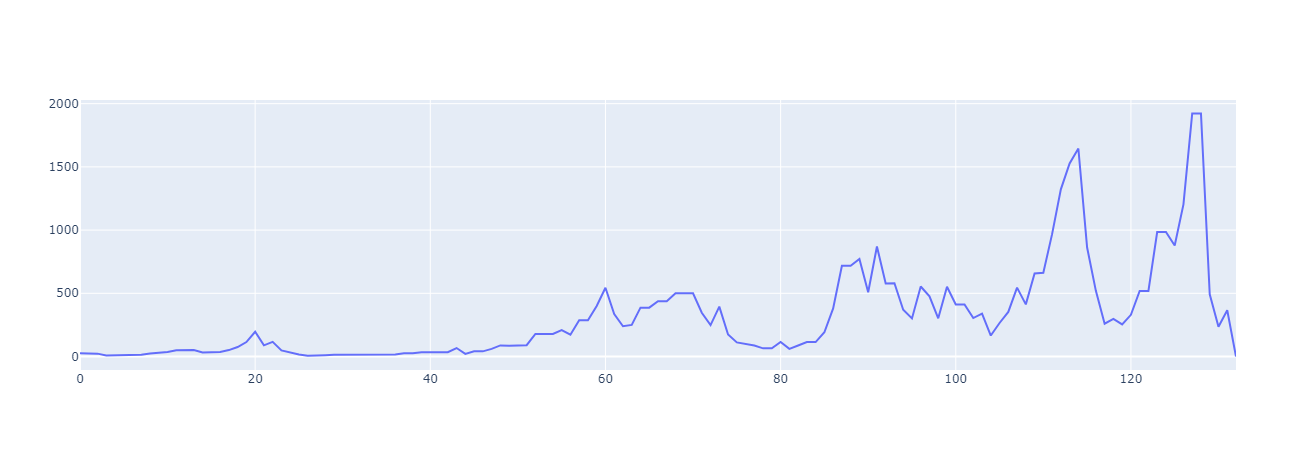

(pid=raylet) F0930 19:32:54.598291 16088 16088 redis_client.cc:74]  Check failed: num_attempts < RayConfig::instance().redis_db_connect_retries() Expected 1 Redis shard addresses, found 2
(pid=raylet) *** Check failure stack trace: ***
(pid=raylet)     @     0x7f50801aad1d  (unknown)
(pid=raylet)     @     0x7f50801abe7c  (unknown)
(pid=raylet)     @     0x7f50801aa9f9  (unknown)
(pid=raylet)     @     0x7f50801aac11  (unknown)
(pid=raylet)     @     0x7f50801960d9  (unknown)
(pid=raylet)     @     0x7f508000a90d  (unknown)
(pid=raylet)     @     0x7f508000b4a1  (unknown)
(pid=raylet)     @     0x7f507ffa7f7a  (unknown)
(pid=raylet)     @     0x7f507ff40ca6  (unknown)
(pid=raylet)     @     0x7f507fe06fd5  (unknown)
(pid=raylet)     @     0x7f507e8a1b97  (unknown)
(pid=raylet)     @     0x7f507fe196b1  (unknown)
(pid=raylet) F0930 19:34:09.058799 16142 16142 redis_client.cc:74]  Check failed: num_attempts < RayConfig::instance().redis_db_connect_retries() Expected 1 Redis shard address

In [10]:
# Trained Agent
observation = env.reset()
for t in range(1000):
    action = agent.compute_action(observation)
    observation, reward, done, info = env.step(action)
    print(reward, action, observation)
    if done:
        break
env.render()

In [ ]:
ray.shutdown()